# Práctica 1

Procesamiento de Lenguaje Natural

Facultad de Ingeniería, UNAM

Alumno: Andrés González Flores

**Objetivo**: Obtener la curva de Zipf de los tipos de un corpus en escala logaríıtmica y determinar el parámetro α correspondiente a esa distribución.

Pasos a seguir:

1. Escoger un corpus de cualquier idioma y de un tamaño mayor a 10,000 tokens.
2. Limpiar el corpus: eliminar signos de puntuación, de interrogación, admiración y elementos no léxicos.
3. Aplicar un algoritmo de Stemming a los tokens limpios.
4. Obtener las frecuencias de los tipos en el corpus.
5. Ordenar por el rango estadístico de mayor a menor.
6. Graficar el diagrama de dispersión rango-frecuencia en la escala logarítmica.
7. Obtener el parámetro de la distribución de Zipf $\alpha$ (a partir de un procedimiento de regresión).




## Desarrollo

### Paso 1

El corpus que elegí se compone de 88 boletines de prensa de la campaña electoral de AMLO en las elecciones presidenciales de 2018.

Cada boletin tiene el siguiente formato:

```json
{
    "uuid" : "e58c384c-e99d-427a-98af-67ad7eca7b93",
    "fuente" : "https:\/\/lopezobrador.org.mx\/2018\/04\/02\/amlo-visita-el-municipio-de-santa-catarina-en-nuevo-leon\/",
    "fecha" : "2018\/04\/02",
    "encabezado" : "Asegura AMLO que en campaña todo será amor y paz, que los otros candidatos se ahorren sus provocaciones",
    "sumarios" : [
        "Adelanta López Obrador que no pasará nada el primero de julio cuando se lleven a cabo las elecciones presidenciales",
        "Expresa que esperará que Donald Trump se serene y lo hará entrar en razón","Invita a que se realice un encuentro público entre técnicos para debatir si es viable o no la construcción del nuevo aeropuerto en el Lago de Texcoco"
        ],
    "contenido" : "Andrés Manuel López Obrador, candidato a la Presidencia de México, inicia en Santa Catarina un recorrido por municipios de (...)"
}
```

De estos, se tomará únicamente su contenido

In [1]:
import pandas as pd
import re

data = pd.read_json('Prácticas/1/Data/boletines-AMLO.json', encoding='utf-8', dtype='dict')
boletines = data['boletines']
corpus = "\n".join([ boletin['contenido'] for boletin in boletines ])

### Paso 2

Se consideran tokens que cumplan con la expresión regular \[a-zA-zñáéíóúüÁÉÍÓÚÜÑ\]+. Luego, se pasan a minúsculas.

In [2]:
tokens = re.findall('[a-zA-zñáéíóúüÁÉÍÓÚÜÑ]+', corpus)
tokens = [token.lower() for token in tokens]

### Paso 3

Usaré el algoritmo de Snowball stemming de la librería nltk

In [3]:
import nltk
from nltk import SnowballStemmer

es_stemmer = SnowballStemmer('spanish')
stems = [es_stemmer.stem(token) for token in tokens]

### Paso 4

Luego, usaré el módulo collections para crear un objeto Counter que me dé la frecuencia de los stems.

In [4]:
from collections import Counter

conteo_stems = Counter(stems)

### Paso 5

Ordeno los stems de mayor a menor frecuencia.

In [7]:
ordered_stems = sorted(conteo_stems.items(), key=lambda x: x[1], reverse=True) # El criterio a ordenar es la frecuencia

In [11]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Usuario.000\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


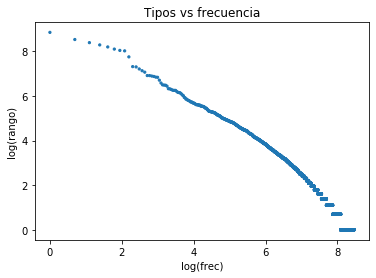

In [20]:
labels, frec = zip(*ordered_stems)
x = np.arange(len(labels))

plt.figure()
plt.scatter(np.log(x), np.log(frec), s=(5,5))
plt.xlabel('log(frec)')
plt.ylabel('log(rango)')
plt.title('Tipos vs frecuencia')   

plt.show()